In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn import metrics, model_selection, preprocessing
import time
import statistics

In [3]:
Ames = pd.read_csv('Ames_Modified.csv')
Ames.drop(['Unnamed: 0'],axis=1,inplace=True)
Ames.index = range(Ames.shape[0])

In [4]:
Nan_col = {}
for icol in Ames.columns:
    if (np.sum(pd.isna(Ames.loc[:,icol])!=0)):
        num_nan = np.sum(pd.isna(Ames.loc[:,icol]))
        Nan_col[icol] = num_nan

In [5]:
print('Features that have missed values are :')
Nan_col

Features that have missed values are :


{'Lot_Frontage': 490,
 'Mas_Vnr_Type': 23,
 'Mas_Vnr_Area': 23,
 'Bsmt_Qual': 80,
 'Bsmt_Exposure': 83,
 'Bsmt_Unf_SF': 1,
 'Total_Bsmt_SF': 1,
 'Bsmt_Full_Bath': 2,
 'Bsmt_Half_Bath': 2,
 'Fireplace_Qu': 1422,
 'Garage_Type': 157,
 'Garage_Finish': 159,
 'Garage_Cars': 1,
 'Garage_Area': 1,
 'Garage_Qual': 159,
 'basement_type': 81,
 'basement_area': 1,
 'garage_age': 159}

In [10]:
pd.DataFrame(Nan_col.values(), index = Nan_col.keys(), columns = ['Missed']).sort_values(by=['Missed'],ascending=False).to_csv('NanFeatures.csv')

In [7]:
pd.DataFrame(Nan_col.values(), index = Nan_col.keys())

,0
Lot_Frontage,490
Mas_Vnr_Type,23
Mas_Vnr_Area,23
Bsmt_Qual,80
Bsmt_Exposure,83
Bsmt_Unf_SF,1
Total_Bsmt_SF,1
Bsmt_Full_Bath,2
Bsmt_Half_Bath,2
Fireplace_Qu,1422


In [11]:
data = np.zeros((1,Ames.shape[1]))
for irow in range(Ames.shape[0]):
    if (np.sum(pd.isna(Ames.iloc[irow,:]))==0):
        data = np.vstack([data,Ames.iloc[irow,:].values])
data = data[1:,:]
Ames_clean = pd.DataFrame(data = data, columns = Ames.columns)
Ames_clean.index = range(Ames_clean.shape[0])

In [12]:
Ames_clean.index

RangeIndex(start=0, stop=1156, step=1)

In [13]:
print("Shape of the scrapped dataset is :"+str(Ames.shape))
print("Shape of the dataset without any Nan is :"+str(Ames_clean.shape))

Shape of the scrapped dataset is :(2930, 59)
Shape of the dataset without any Nan is :(1156, 59)


In [14]:
import random

In [15]:
selected_indices = list(set(random.choices(range(Ames_clean.shape[0]), k = int (Ames_clean.shape[0] * 0.3))))

In [16]:
print('Number of selected indices from clean dataset is :'+str(len(selected_indices)))
print('Shape of the dataset without any Nan is :'+str(Ames_clean.shape))

Number of selected indices from clean dataset is :302
Shape of the dataset without any Nan is :(1156, 59)


In [17]:
308/1156

0.2664359861591695

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
Ames_clean_nan       = Ames_clean.iloc[selected_indices,:]
Ames_clean_nan.index = selected_indices
Ames_clean_notnan    = Ames_clean_nan.copy()

rows_feature_nan = {}

for ifeature in Nan_col:
    
    rows_feature_nan[ifeature] = [] 
    
Nan_length = len(Nan_col.keys())
Nan_list = list(Nan_col.keys())

for irow in selected_indices:
    
    random_number = random.choices(range(1,Nan_length),k=1)[0]
    random_features = list(set(random.choices(Nan_list,k = random_number)))
    Ames_clean_nan.loc[irow,random_features] = np.nan
    for ifeature in random_features:
        rows_feature_nan[ifeature].append(irow) 

In [20]:
print('Size of Ames clean dataset are :' + str(Ames_clean.shape))
print('Size of Ames clean dataset "to be nan" are :' + str(Ames_clean_nan.shape))

Size of Ames clean dataset are :(1156, 59)
Size of Ames clean dataset "to be nan" are :(302, 59)


In [21]:
temp_list = []
for ifeature in Ames_clean_nan.columns:
    if (np.sum(Ames_clean_nan.loc[:,ifeature].isna()) != 0):
        temp_list.append(ifeature)
print(set(temp_list)-set(Nan_col.keys()))
print(set(Nan_col.keys())-set(temp_list))

set()
set()


In [22]:
Ames_clean_nan.sample(5)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Lot_Shape,Land_Contour,Lot_Config,Land_Slope,Neighborhood,Condition_1,...,Mo_Sold,Sale_Type,Sale_Condition,SalePrice,exterior,basement_type,basement_area,age,remodeled_age,garage_age
178,60,RL,59.0,23303,IR3,Lvl,CulDSac,Gtl,NridgHt,Norm,...,6,WD,Family,409900,VinylSd_VinylSd,NaN,NaN,2,0,2.0
972,20,RL,65.0,10237,Reg,Lvl,Inside,Gtl,Gilbert,RRAn,...,10,New,Partial,169990,VinylSd_VinylSd,GLQ_Unf,NaN,1,1,1.0
574,60,RL,NaN,6931,Reg,Lvl,Inside,Gtl,Edwards,Norm,...,7,WD,Normal,165400,VinylSd_VinylSd,NaN,NaN,5,1,NaN
995,60,RL,NaN,17242,IR1,Lvl,Inside,Gtl,NoRidge,Norm,...,5,WD,Normal,584500,MetalSd_MetalSd,NaN,NaN,13,1,NaN
1090,80,RL,NaN,11679,IR1,Lvl,Inside,Gtl,Edwards,Norm,...,5,WD,Normal,182000,Plywood_Plywood,ALQ_Rec,NaN,44,0,44.0


In [23]:
categorical_features = ['MS_SubClass','MS_Zoning','Lot_Shape','Land_Contour','Lot_Config','Land_Slope']
categorical_features.extend(['Neighborhood','Condition_1','Bldg_Type','House_Style','Roof_Style'])
categorical_features.extend(['Mas_Vnr_Type','Exter_Qual','Exter_Cond','Foundation','Bsmt_Qual','Bsmt_Exposure'])
categorical_features.extend(['basement_type','Heating_QC','Garage_Finish','Mo_Sold','Sale_Type','Sale_Condition','Kitchen_Qual'])
categorical_features.extend(['exterior','Fireplace_Qu','Garage_Type','Garage_Qual'])

Ordinal_featues = ['Overall_Qual','Overall_Cond','Bsmt_Full_Bath','Bsmt_Half_Bath','Bedroom_AbvGr','Full_Bath',
                  'Half_Bath','Kitchen_AbvGr','TotRms_AbvGrd','Fireplaces','Garage_Cars']

Continous_features = ['Lot_Frontage','Lot_Area','age','remodeled_age','Mas_Vnr_Area','basement_area']
Continous_features.extend(['Bsmt_Unf_SF','Total_Bsmt_SF','1st_Flr_SF','2nd_Flr_SF','Low_Qual_Fin_SF'])
Continous_features.extend(['Gr_Liv_Area'])              
Continous_features.extend(['Garage_Area'])
Continous_features.extend(['Wood_Deck_SF','Open_Porch_SF','Enclosed_Porch','Screen_Porch','Pool_Area'])
Continous_features.extend(['SalePrice','garage_age'])

In [24]:
print(len(categorical_features))
print(len(Ordinal_featues))
print(len(Continous_features))

28
11
20


In [26]:
fill_values = {}
for icol in Ames_clean_nan.columns:
    if ((icol in categorical_features) | (icol in Ordinal_featues)):
        fill_values[icol] = Ames_clean_nan.loc[:,icol].mode().values[0]
    elif (icol in Continous_features):
        fill_values[icol] = Ames_clean_nan.loc[:,icol].median()
    else:
        print('Error for'+icol)

In [27]:
Ames_clean_nan_median = Ames_clean_nan.fillna(fill_values)

In [28]:
fill_values = {}
for icol in Ames_clean_nan.columns:
    if ((icol in categorical_features) | (icol in Ordinal_featues)):
        fill_values[icol] = Ames_clean_nan.loc[:,icol].mode().values[0]
    elif (icol in Continous_features):
        fill_values[icol] = Ames_clean_nan.loc[:,icol].mean()
    else:
        print('Error for'+icol)

In [29]:
Ames_clean_nan_mean = Ames_clean_nan.fillna(fill_values)

In [30]:
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

In [31]:
def sum_diag_fun(x):
    sum_diag = 0
    for i in range(len(x)):
        sum_diag = sum_diag + x[i,i]
    return sum_diag

In [32]:
n_neighbors = np.arange(1,50,1)
mean_error = {}
median_error = {}

for icol in Nan_col.keys():
    
    if (icol in categorical_features):
        
        try:
            
            data = confusion_matrix(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,
                                    Ames_clean_nan_median.loc[rows_feature_nan[icol],icol].values)
            median_error[icol] = np.round(100 * sum_diag_fun(data)/np.sum(np.sum(data)),2)
            data = confusion_matrix(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,
                                    Ames_clean_nan_mean.loc[rows_feature_nan[icol],icol].values)
            mean_error[icol] =   np.round(100 * sum_diag_fun(data)/(np.sum(np.sum(data))),2)
            
        except:
            
            data = r2_score(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,
                            Ames_clean_nan_median.loc[rows_feature_nan[icol],icol].values)
            
            median_error[icol] = np.round(100 * data,2)
            
            data = r2_score(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,
                            Ames_clean_nan_mean.loc[rows_feature_nan[icol],icol].values)
            
            mean_error[icol] =     np.round(100 * data,2)
            
    elif ((icol in Ordinal_featues) | (icol in Continous_features)):
        
        median_error[icol] =  np.round(100 * r2_score(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values, 
                                             Ames_clean_nan_median.loc[rows_feature_nan[icol],icol].values),2)
        mean_error[icol]   =  np.round(100 * r2_score(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,
                                             Ames_clean_nan_mean.loc[rows_feature_nan[icol],icol].values),2)
    else:
        print('Error')

In [33]:
for ifeature in rows_feature_nan.keys():
    try:
        median_value = Ames_clean_nan.loc[:,ifeature].median()
        Ames_clean_nan.loc[rows_feature_nan[ifeature],ifeature] = median_value 
    except:
        mode_values = Ames_clean_nan.loc[:,ifeature].mode().values[0]
        Ames_clean_nan.loc[rows_feature_nan[ifeature],ifeature] = mode_values 

In [34]:
Ames.shape 

(2930, 59)

In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
oe = OrdinalEncoder()
data_oe_transformed = oe.fit_transform(Ames_clean_nan)
imputation_error = np.zeros((len(n_neighbors),len(Nan_col.keys())))
imputation_error_weight = np.zeros((len(n_neighbors),len(Nan_col.keys())))

In [37]:
neg_fun = np.vectorize(lambda x: not x)

In [38]:
AmesOriginal = Ames.copy()
for ifeature in Nan_col.keys():
    temp_df = AmesOriginal.loc[:,ifeature]
    temp_data = temp_df.values
    temp_index = neg_fun(pd.isna(temp_df).values)
    AmesOriginal.loc[pd.isna(temp_df).values,ifeature] = statistics.mode(temp_data[temp_index])

In [ ]:
#for ifeature in AmesOriginal.columns:
    #print(np.sum(pd.isna(AmesOriginal.loc[:,ifeature])))

In [39]:
oeFinal = OrdinalEncoder()
AmesOriginal_data = oeFinal.fit_transform(AmesOriginal)

In [40]:
AmesOriginal = pd.DataFrame(AmesOriginal_data,columns=Ames.columns,index = list(Ames.index))

for ifeature in Nan_col.keys():
    nan_index = pd.isna(Ames.loc[:,ifeature])
    AmesOriginal.loc[nan_index,ifeature] = np.nan

In [41]:
for ifeature in AmesOriginal.columns:
    df = AmesOriginal.loc[:,ifeature]
    np_sum = np.sum(pd.isna(df))
    if (np_sum!=0):
        print(ifeature + ': ' + str(np_sum))

Lot_Frontage: 490
Mas_Vnr_Type: 23
Mas_Vnr_Area: 23
Bsmt_Qual: 80
Bsmt_Exposure: 83
Bsmt_Unf_SF: 1
Total_Bsmt_SF: 1
Bsmt_Full_Bath: 2
Bsmt_Half_Bath: 2
Fireplace_Qu: 1422
Garage_Type: 157
Garage_Finish: 159
Garage_Cars: 1
Garage_Area: 1
Garage_Qual: 159
basement_type: 81
basement_area: 1
garage_age: 159


In [ ]:
#oeFinal.inverse_transform

In [42]:
data_oe_transformed = pd.DataFrame(data = data_oe_transformed, columns = Ames_clean_nan.columns,index = Ames_clean_nan.index)
for ifeature in rows_feature_nan.keys():
    data_oe_transformed.loc[rows_feature_nan[ifeature],ifeature] = np.nan

In [43]:
for index_neighbor, ineighbor in enumerate(n_neighbors):
    
    imputer = KNNImputer(n_neighbors=ineighbor)
    d = imputer.fit_transform(data_oe_transformed)
    d = oe.inverse_transform(d)
    df = pd.DataFrame(data = d, columns=Ames_clean_nan.columns, index = Ames_clean_nan.index)
    
    for index_col, icol in enumerate(Nan_col.keys()):
        
        if (icol in categorical_features):
            try:
                data = confusion_matrix(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,df.loc[rows_feature_nan[icol],icol].values)
                imputation_error[index_neighbor,index_col] = np.round(100 * sum_diag_fun(data)/(sum(sum(data))),2)
            except:
                data = r2_score(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,df.loc[rows_feature_nan[icol],icol].values)
                imputation_error[index_neighbor,index_col] = np.round(100 * data,2)
        elif ((icol in Ordinal_featues) | (icol in Continous_features)):
            data = r2_score(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,df.loc[rows_feature_nan[icol],icol].values)
            imputation_error[index_neighbor,index_col] = np.round(100 * data,2)
imputation_error = pd.DataFrame(data=imputation_error,columns=Nan_col.keys(),index = n_neighbors)

In [44]:
for index_neighbor, ineighbor in enumerate(n_neighbors):
    imputer = KNNImputer(n_neighbors=ineighbor,weights='distance')
    d = imputer.fit_transform(data_oe_transformed)
    d = oe.inverse_transform(d)
    df = pd.DataFrame(data = d, columns=Ames_clean_nan.columns, index = Ames_clean_nan.index)
    
    for index_col, icol in enumerate(Nan_col.keys()):
        
        if (icol in categorical_features):
            try:
                data = confusion_matrix(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,df.loc[rows_feature_nan[icol],icol].values)
                imputation_error_weight[index_neighbor,index_col] = np.round(100 * sum_diag_fun(data)/(sum(sum(data))),2)
            except:
                data = r2_score(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,df.loc[rows_feature_nan[icol],icol].values)
                imputation_error_weight[index_neighbor,index_col] = np.round(100 * data,2)
        elif ((icol in Ordinal_featues) | (icol in Continous_features)):
            data = r2_score(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,df.loc[rows_feature_nan[icol],icol].values)
            imputation_error_weight[index_neighbor,index_col] = np.round(100 * data,2)
            
imputation_error_weight = pd.DataFrame(data=imputation_error_weight,columns=Nan_col.keys(),index = n_neighbors)

In [45]:
median_error = pd.DataFrame(data = median_error, columns = Nan_col.keys(), index = [1])
mean_error = pd.DataFrame(data = mean_error, columns = Nan_col.keys(), index = [1])
imputation_error.to_csv('KNNImputation.csv')
imputation_error_weight.to_csv('KNNImputationWeight.csv')

In [46]:
Ames_clean.to_csv('AmesCleanDataSet.csv')

In [47]:
x_median = list(median_error.T.index.values)
y_median = [abs(x) for x in median_error.values.tolist()[0]]#[abs(ele) for ele in test_list]
x_mean   = list(mean_error.T.index.values) 
y_mean   = [abs(x) for x in mean_error.values.tolist()[0]]

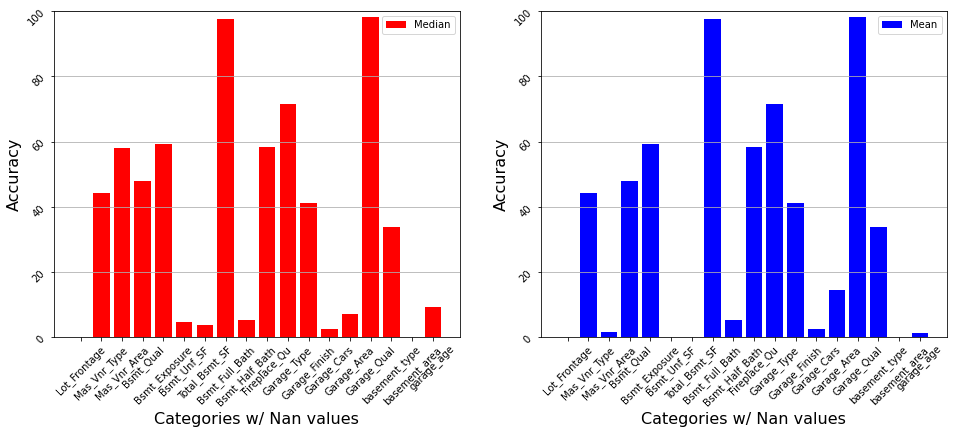

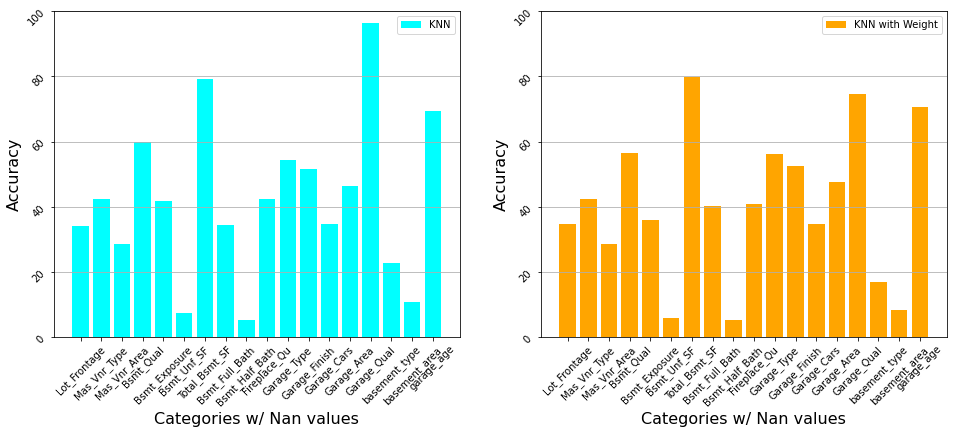

In [57]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

ax[0].bar(x_median,np.abs(y_median),color='red',label='Median')
ax[0].set_xlabel('Categories w/ Nan values', fontsize = 16)
ax[0].set_ylabel('Accuracy', fontsize = 16)
ax[0].legend()
ax[0].set_xticks(x_median)
ax[0].tick_params(rotation=45.0)
ax[0].set_ylim([0,100])
ax[0].grid(axis="y")

ax[1].bar(x_mean,np.abs(y_mean),color='blue',label='Mean')
ax[1].set_xlabel('Categories w/ Nan values', fontsize = 16)
ax[1].set_ylabel('Accuracy', fontsize = 16)
ax[1].legend()
ax[1].set_xticks(x_mean)
ax[1].tick_params(rotation=45.0)
ax[1].set_ylim([0,100])
ax[1].grid(axis="y")

fig,ax = plt.subplots(1,2,figsize=(16,6))

ax[0].bar(imputation_error.columns,np.abs(imputation_error.iloc[2,:].values),color='cyan',label='KNN')
ax[0].set_xlabel('Categories w/ Nan values', fontsize = 16)
ax[0].set_ylabel('Accuracy', fontsize = 16)
ax[0].legend()
ax[0].set_xticks(x_mean)
ax[0].tick_params(rotation=45.0)
ax[0].set_ylim([0,100])
ax[0].grid(axis="y")

ax[1].bar(imputation_error_weight.columns,np.abs(imputation_error_weight.iloc[2,:].values),color='orange',label='KNN with Weight')
ax[1].set_xlabel('Categories w/ Nan values', fontsize = 16)
ax[1].set_ylabel('Accuracy', fontsize = 16)
ax[1].legend()
ax[1].set_xticks(x_mean)
ax[1].tick_params(rotation=45.0)
ax[1].set_ylim([0,100])
ax[1].grid(axis="y")

List of features which have at least one sample missed: <br>
1."Lot frontage", KNN<br>
2."Mas_Vnr_Type", KNN weight<br>
3."Mas_Vnr_Area", Median<br>
4."Bsmt_Qual", KNN Weight<br>
5."Bsmt_Exposure", Median<br>
6. "Bsmt_Unf_SF", Median <br>
7."Total_Bsmt_SF", KNN weight<br>
8."Bsmt_Full_Bath", Median<br>
9."Bsmt_Half_Bath", KNN<br>
10."Fireplace_Qu", Median<br>
11."Garage_Type:, Median<br>
12."Garage_Finish", KNN weight<br>
13."Garage_Cars", KNN<br>
14."Garage_Area", KNN<br>
15."Garage_Qual", Median<br>
16."basement_type", KNN weight<br>
17."basement_area", KNN<br>
18."garage_age", KNN<br>

In [ ]:
#index = 0
#feature_name = list(Nan_col.keys())[index]
#y_val1 = list(imputation_error.loc[:,feature_name].values)
#y_val2 = list(imputation_error_weight.loc[:,feature_name].values)
#print(feature_name)
#print(max(y_val1))
#print(max(y_val2))
#print(np.abs(y_median[index]))
#print(np.abs(y_mean[index]))

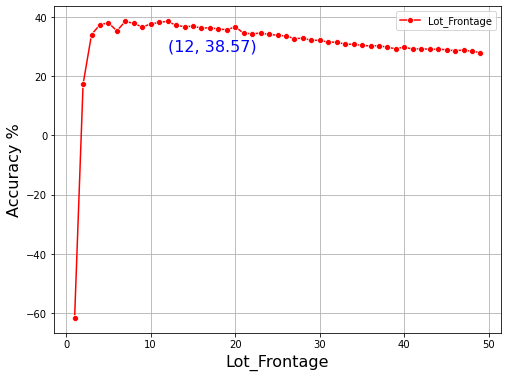

In [58]:
index = 0
x_val = list(imputation_error.index)
feature_name = list(Nan_col.keys())[index]
y_val = list(imputation_error.loc[:,feature_name].values)
max_index = np.where(y_val==max(y_val))[0][0]
max_val = y_val[max_index]

ax,fig = plt.subplots(1,1,figsize=(8,6))
sns.lineplot(data = imputation_error, x = x_val, y = 'Lot_Frontage', marker='o', color = 'red',label=feature_name)
plt.xlabel(feature_name,fontsize=16)
plt.ylabel('Accuracy %',fontsize=16)
plt.text(x_val[max_index], y_val[max_index] - 10, '({}, {})'.format(x_val[max_index], y_val[max_index]),
         fontsize=16,color='blue')
plt.legend()
plt.grid()
plt.show()

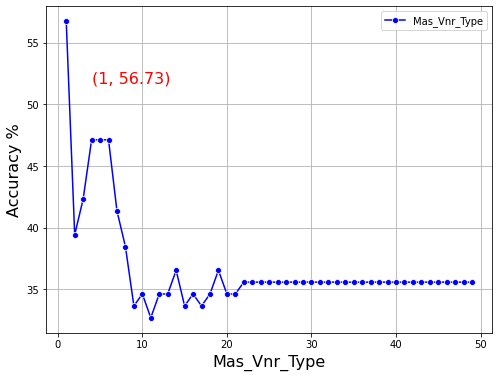

In [61]:
index = 1
x_val = list(imputation_error.index)
feature_name = list(Nan_col.keys())[index]
y_val = list(imputation_error.loc[:,feature_name].values)
max_index = np.where(y_val==max(y_val))[0][0]
max_val = y_val[max_index]

ax,fig = plt.subplots(1,1,figsize=(8,6))
sns.lineplot(data = imputation_error, x = x_val, y = feature_name, marker='o', color = 'blue',label=feature_name)
plt.xlabel(feature_name,fontsize=16)
plt.ylabel('Accuracy %',fontsize=16)
plt.text(x_val[max_index] + 3, y_val[max_index] - 5, '({}, {})'.format(x_val[max_index], y_val[max_index]),
        fontsize=16,color='red')
plt.legend()
plt.grid()
plt.show()

In [62]:
knn = []

for ifeature in imputation_error_weight.columns:
    
    temp_data = imputation_error_weight.loc[:,ifeature].values
    max_val = np.max(temp_data)
    max_index = np.where(temp_data == max_val)[0][0] + 1
    knn.append(max_index)

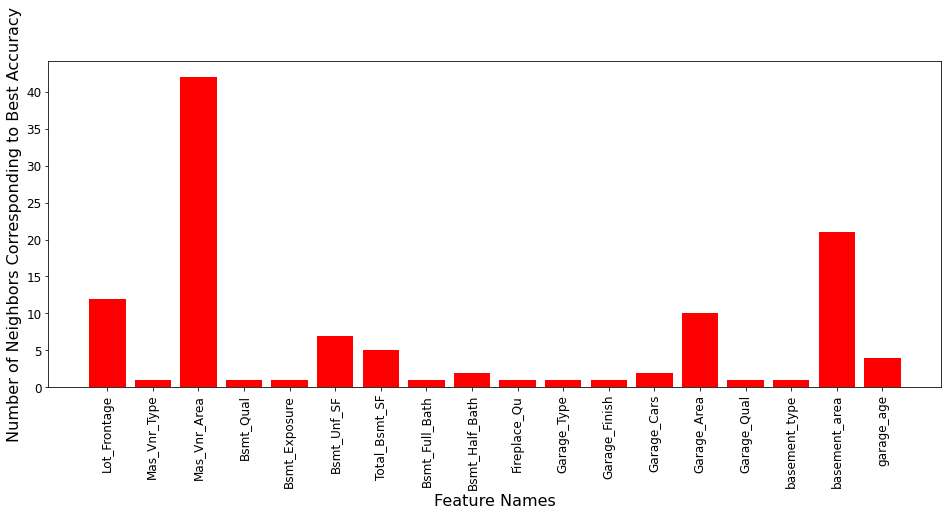

In [63]:
ax,fig = plt.subplots(1,1,figsize=(16,6))
plt.bar(x = imputation_error_weight.columns,height = knn,color='red',label='Maximum accuracy')
plt.xlabel('Feature Names',fontsize=16)
plt.ylabel('Number of Neighbors Corresponding to Best Accuracy',fontsize=16)
plt.xticks(rotation = 90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
#Ames.loc[:,'Lot_Frontage'].fillna(np.max(imputation_error.loc[:,'Lot_Frontage'].values),inplace=True)
#Ames.loc[:,'Mas_Vnr_Type'].fillna(np.max(imputation_error_weight.loc[:,'Mas_Vnr_Type'].values),inplace=True)
#Ames.loc[:,'Mas_Vnr_Area'].fillna(y_median[2],inplace=True)
#Ames.loc[:,'Bsmt_Qual'].fillna(np.max(imputation_error_weight.loc[:,'Bsmt_Qual'].values),inplace=True)
#Ames.loc[:,'Bsmt_Exposure'].fillna(y_median[4],inplace=True)
#Ames.loc[:,'Bsmt_Unf_SF'].fillna(y_median[5],inplace=True)
#Ames.loc[:,'Total_Bsmt_SF'].fillna(np.max(imputation_error_weight.loc[:,'Total_Bsmt_SF'].values),inplace=True)
#Ames.loc[:,'Bsmt_Full_Bath'].fillna(y_median[7],inplace=True)
#Ames.loc[:,'Bsmt_Half_Bath'].fillna(np.max(imputation_error.loc[:,'Bsmt_Half_Bath'].values),inplace=True)
#Ames.loc[:,'Fireplace_Qu'].fillna(y_median[9],inplace=True)
#Ames.loc[:,'Garage_Type'].fillna(y_median[10],inplace=True)
#Ames.loc[:,'Garage_Finish'].fillna(np.max(imputation_error_weight.loc[:,'Garage_Finish'].values),inplace=True)
#Ames.loc[:,'Garage_Cars'].fillna(np.max(imputation_error.loc[:,'Garage_Cars'].values),inplace=True)
#Ames.loc[:,'Garage_Area'].fillna(np.max(imputation_error.loc[:,'Garage_Area'].values),inplace=True)
#Ames.loc[:,'Garage_Qual'].fillna(y_median[14],inplace=True)
#Ames.loc[:,'basement_type'].fillna(np.max(imputation_error_weight.loc[:,'basement_type'].values),inplace=True)
#Ames.loc[:,'basement_area'].fillna(np.max(imputation_error.loc[:,'basement_area'].values),inplace=True)
#Ames.loc[:,'garage_age'].fillna(np.max(imputation_error.loc[:,'garage_age'].values),inplace=True)

In [64]:
knn         = KNNImputer(n_neighbors = 3)
knn_data    = knn.fit_transform(AmesOriginal)

In [65]:
iknn_data = oeFinal.inverse_transform(knn_data)
AmesFinalDB = pd.DataFrame(data = iknn_data, columns = Ames.columns, index = range(Ames.shape[0]))

In [66]:
AmesFinalDB.to_csv('AmesFinalDB.csv')